<a href="https://colab.research.google.com/github/siva-sankar-a/erav1/blob/main/session_6_multiple_architectures_mnist/Session_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA V1 Session 6
## Refer [link](https://github.com/siva-sankar-a/erav1/tree/main/session_5_split_code_to_files) for further documentation

## Cloning the Github repository
## [Session 6](https://github.com/siva-sankar-a/erav1.git)

In [1]:
!git clone https://github.com/siva-sankar-a/erav1.git

fatal: destination path 'erav1' already exists and is not an empty directory.


In [2]:
%cd /content/erav1

/content/erav1


In [3]:
!git pull

Already up to date.


## Adding the session folder to path in order to access the functions defined

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys

In [6]:
sys.path.append('/content/erav1/session_6_multiple_architectures_mnist/')

In [7]:
import importlib

In [8]:
import utils as U

In [ ]:
U = importlib.reload(U)

## Get device

In [9]:
device = U.get_device()
print(device)

CUDA Available? True
cuda


In [10]:
import pandas as pd

In [11]:
pd.options.plotting.backend = "plotly"

## Get train and test transforms

In [9]:
train_transforms = U.get_train_transforms()
test_transforms = U.get_test_transforms()

## Get dataset

In [13]:
train_dataset = U.get_train_dataset(train_transforms)
test_dataset = U.get_test_dataset(test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 136112984.92it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36541687.43it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39456699.62it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3845484.21it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



## Get train and test dataloader

In [14]:
batch_size = 512
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_dataloader = U.get_train_dataloader(train_dataset, **kwargs)
test_dataloader = U.get_test_dataloader(test_dataset, **kwargs)

## Display image grid

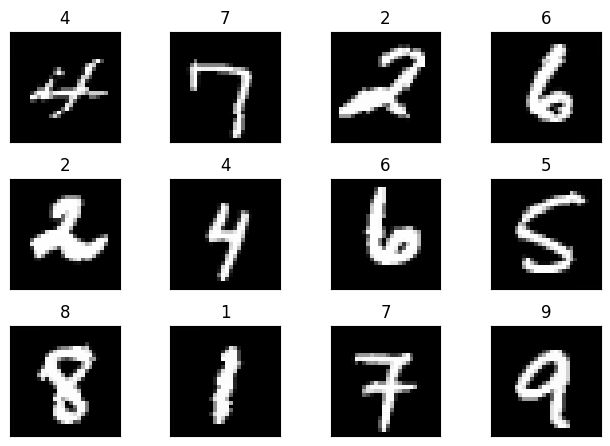

In [15]:
U.show_image_grid(train_dataloader)

In [16]:
!git clone https://github.com/Fangyh09/pytorch-receptive-field.git

Cloning into 'pytorch-receptive-field'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 111 (delta 37), reused 23 (delta 23), pack-reused 67
Receiving objects: 100% (111/111), 27.59 KiB | 4.60 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [17]:
sys.path.append('/content/erav1/pytorch-receptive-field')

In [18]:
from torch_receptive_field import receptive_field

In [71]:
import torch.nn as nn
import torch.nn.functional as F

In [116]:
class Net(nn.Module):

    '''
    This class implements the neural network model 

    Usage:
    >>> device = ...
    >>> model = Net().to('cpu')
    '''

    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            self.conv3x3(1, 2, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(2),
            nn.Dropout(0.1)
        )
        self.conv2 = nn.Sequential(
            self.conv3x3(2, 2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(2),
            nn.Dropout(0.1)
        )
        self.conv3 = nn.Sequential(
            self.conv3x3(2, 16, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1)
        )
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Sequential(
            self.conv3x3(16, 16, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1)
        )
        self.conv5 = nn.Sequential(
            self.conv3x3(16, 16, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1)
        )
        self.conv6 = nn.Sequential(
            self.conv3x3(16, 16, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1)
        )
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv7 = nn.Sequential(
            self.conv3x3(16, 16, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1)
        )
        self.conv8 = nn.Sequential(
            self.conv3x3(16, 16, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1)
        )
        self.conv9 = nn.Sequential(
            self.conv3x3(16, 32, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.1)
        )
        self.gap = nn.AvgPool2d(4)
        self.mixer = nn.Sequential(
            self.conv1x1(32, 10),
        )


    def conv3x3(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels, 
                    out_channels, 
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)

    def conv1x1(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels, 
                    out_channels, 
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.maxpool1(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        # x = self.maxpool2(x)
        x = self.conv7(x)
        x = self.conv8(x)
        x = self.conv9(x)
        x = self.gap(x)
        x = self.mixer(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=1)

## Generate model summary

In [117]:
model = Net().to('cpu')
U.show_summary(model, -1, 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 26, 26]              18
              ReLU-2            [-1, 2, 26, 26]               0
       BatchNorm2d-3            [-1, 2, 26, 26]               4
           Dropout-4            [-1, 2, 26, 26]               0
            Conv2d-5            [-1, 2, 26, 26]              36
              ReLU-6            [-1, 2, 26, 26]               0
       BatchNorm2d-7            [-1, 2, 26, 26]               4
           Dropout-8            [-1, 2, 26, 26]               0
            Conv2d-9           [-1, 16, 24, 24]             288
             ReLU-10           [-1, 16, 24, 24]               0
      BatchNorm2d-11           [-1, 16, 24, 24]              32
          Dropout-12           [-1, 16, 24, 24]               0
        MaxPool2d-13           [-1, 16, 12, 12]               0
           Conv2d-14           [-1, 16,

## Training

In [118]:
model = Net().to(device)

In [119]:
import torch.optim as optim

In [120]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
num_epochs = 20

metrics = { 'train_acc': [], 'train_losses': [],
            'test_acc': [], 'test_losses': [] }

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}')
    U.train(model, device, train_dataloader, optimizer, metrics)
    U.test(model, device, test_dataloader, metrics)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0651 Batch_id=117 Accuracy=89.08: 100%|██████████| 118/118 [00:19<00:00,  6.17it/s]


Test set: Average loss: 0.0628, Accuracy: 9802/10000 (98.02%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.0556 Batch_id=117 Accuracy=97.65: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]


Test set: Average loss: 0.0367, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.0030 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:19<00:00,  6.16it/s]


Test set: Average loss: 0.0329, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.0246 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:19<00:00,  6.10it/s]


Test set: Average loss: 0.0373, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.0700 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]


Test set: Average loss: 0.0286, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Train: Loss=0.0340 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:19<00:00,  5.92it/s]


Test set: Average loss: 0.0251, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0577 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:18<00:00,  6.33it/s]


Test set: Average loss: 0.0195, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0260 Batch_id=117 Accuracy=98.91: 100%|██████████| 118/118 [00:19<00:00,  6.17it/s]


Test set: Average loss: 0.0201, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0070 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:19<00:00,  5.94it/s]


Test set: Average loss: 0.0199, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0999 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [00:19<00:00,  6.06it/s]


Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0178 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:19<00:00,  6.15it/s]


Test set: Average loss: 0.0181, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0495 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:19<00:00,  5.99it/s]


Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0609 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:19<00:00,  6.11it/s]


Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0477 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:19<00:00,  6.18it/s]


Test set: Average loss: 0.0185, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0128 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:19<00:00,  5.95it/s]


Test set: Average loss: 0.0180, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0730 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:19<00:00,  6.02it/s]


Test set: Average loss: 0.0178, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0360 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:18<00:00,  6.33it/s]


Test set: Average loss: 0.0181, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0133 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:19<00:00,  5.99it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.0600 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:19<00:00,  6.08it/s]


Test set: Average loss: 0.0178, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.0480 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:18<00:00,  6.39it/s]


Test set: Average loss: 0.0182, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-04.


## Display Results

In [121]:
df = pd.DataFrame(metrics)

In [124]:
df[['train_losses', 'test_losses']].plot()

In [125]:
df[['train_acc', 'test_acc']].plot()